---
title: Finite Difference with Stencils
---

In [4]:
import sys

from pyprojroot import here


# spyder up to find the root
root = here(project_files=[".local"])

# append to path
sys.path.append(str(root))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [140]:
import xarray as xr


path_data = "/Volumes/EMANS_HDD/data/osse_oceanix/raw/sim/NATL60-CJM165_GULFSTREAM_ssh_y2013.1y.nc"
path_data = "/Volumes/EMANS_HDD/data/dc22b_osse/raw/dc_qg_train/dc_qg_train_y2013*.nc"

ds = xr.open_mfdataset(path_data)
# ds = xr.open_dataset(path_data, engine="netcdf4", decode_times=False).assign_coords(time=lambda ds: pd.to_datetime(ds.time))

In [141]:
ds

<xarray.Dataset>
Dimensions:  (time: 1464, lat: 200, lon: 200, nav_lon: 200, nav_lat: 200)
Coordinates:
  * time     (time) datetime64[ns] 2013-10-21 ... 2013-12-20T23:00:00
  * nav_lon  (nav_lon) float64 295.0 295.1 295.1 295.2 ... 304.9 304.9 305.0
  * nav_lat  (nav_lat) float64 33.03 33.08 33.13 33.18 ... 42.88 42.93 42.98
Dimensions without coordinates: lat, lon
Data variables:
    ssh      (time, lat, lon) float64 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>

In [142]:
ds.lon

<xarray.DataArray 'lon' (lon: 200)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])
Dimensions without coordinates: lon

In [135]:
da = xr.DataArray(
    ds.ssh.values,
    coords={
        "time": ds.time.values,
        "lat": ds.nav_lat.values,
        "lon": ds.nav_lon.values,
    },
)

In [136]:
da

<xarray.DataArray (time: 1464, lat: 200, lon: 200)>
array([[[ 0.51218528,  0.50503331,  0.49907017, ...,  0.51113081,
          0.5110653 ,  0.51124686],
        [ 0.5157519 ,  0.50825042,  0.50189924, ...,  0.5013389 ,
          0.50097245,  0.50090927],
        [ 0.52378315,  0.51619595,  0.51484233, ...,  0.4914412 ,
          0.49080253,  0.49043214],
        ...,
        [-0.07313027, -0.0676828 , -0.06590169, ..., -0.14642421,
         -0.13588585, -0.12244648],
        [-0.07278042, -0.0671033 , -0.06222018, ..., -0.15102088,
         -0.13835602, -0.12525074],
        [-0.07292473, -0.06764583, -0.06304688, ..., -0.15423733,
         -0.14079149, -0.12770726]],

       [[ 0.51218528,  0.50503331,  0.49907017, ...,  0.51113081,
          0.5110653 ,  0.51124686],
        [ 0.5157519 ,  0.50825042,  0.50189924, ...,  0.5013389 ,
          0.50097245,  0.50090927],
        [ 0.52378315,  0.51619595,  0.5148407 , ...,  0.49143314,
          0.49080253,  0.49043214],
...
        [-0.07313027, -0.0676828 , -0.06567423, ..., -0.14663879,
         -0.13588585, -0.12244648],
        [-0.07278042, -0.0671033 , -0.06222018, ..., -0.15102088,
         -0.13835602, -0.12525074],
        [-0.07292473, -0.06764583, -0.06304688, ..., -0.15423733,
         -0.14079149, -0.12770726]],

       [[ 0.51218528,  0.50503331,  0.49907017, ...,  0.51113081,
          0.5110653 ,  0.51124686],
        [ 0.5157519 ,  0.50825042,  0.50189924, ...,  0.5013389 ,
          0.50097245,  0.50090927],
        [ 0.52378315,  0.51619595,  0.51453463, ...,  0.49131276,
          0.49080253,  0.49043214],
        ...,
        [-0.07313027, -0.0676828 , -0.06567419, ..., -0.14663967,
         -0.13588585, -0.12244648],
        [-0.07278042, -0.0671033 , -0.06222018, ..., -0.15102088,
         -0.13835602, -0.12525074],
        [-0.07292473, -0.06764583, -0.06304688, ..., -0.15423733,
         -0.14079149, -0.12770726]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-10-21 ... 2013-12-20T23:00:00
  * lat      (lat) float64 33.03 33.08 33.13 33.18 ... 42.83 42.88 42.93 42.98
  * lon      (lon) float64 295.0 295.1 295.1 295.2 ... 304.8 304.9 304.9 305.0

In [134]:
ds

<xarray.Dataset>
Dimensions:  (time: 1464, lat: 200, lon: 200, nav_lon: 200, nav_lat: 200)
Coordinates:
  * time     (time) datetime64[ns] 2013-10-21 ... 2013-12-20T23:00:00
  * nav_lon  (nav_lon) float64 295.0 295.1 295.1 295.2 ... 304.9 304.9 305.0
  * nav_lat  (nav_lat) float64 33.03 33.08 33.13 33.18 ... 42.88 42.93 42.98
    lat      (nav_lat) float64 33.03 33.08 33.13 33.18 ... 42.88 42.93 42.98
    lon      (nav_lon) float64 295.0 295.1 295.1 295.2 ... 304.9 304.9 305.0
Data variables:
    ssh      (time, lat, lon) float64 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>

In [127]:
ds.isel(time=200).ssh

<xarray.DataArray 'ssh' (lat: 200, lon: 200)>
dask.array<getitem, shape=(200, 200), dtype=float64, chunksize=(200, 200), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2013-10-29T08:00:00
Dimensions without coordinates: lat, lon

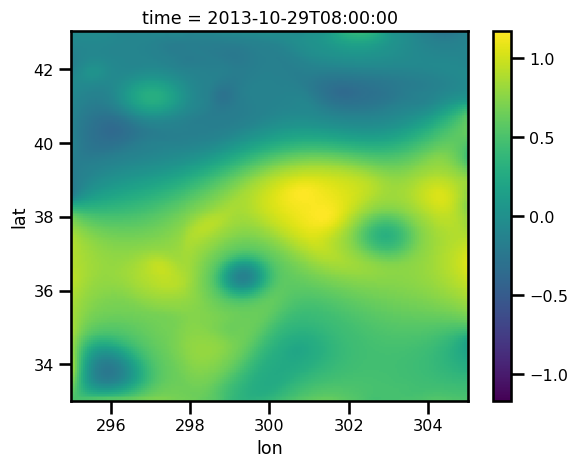

In [137]:
fig, ax = plt.subplots()
da.isel(time=200).plot(ax=ax, cmap="viridis")
plt.show()

In [8]:
import imageio


def load_fox():
    # FOX
    image_url = "https://live.staticflickr.com/7492/15677707699_d9d67acf9d_b.jpg"
    img = imageio.imread(image_url)[..., :3] / 255.0
    c = [img.shape[0] // 2, img.shape[1] // 2]
    r = 256
    img = img[c[0] - r : c[0] + r, c[1] - r : c[1] + r]
    return img


def load_earth():
    # EARTH
    image_url = "https://i0.wp.com/thepythoncodingbook.com/wp-content/uploads/2021/08/Earth.png?w=301&ssl=1"
    img = imageio.imread(image_url)[..., :3] / 255.0
    # TODO: crop the image slightly
    return img


import skimage


def load_cameraman():
    img = skimage.data.camera() / 255.0
    return img[..., None]

In [9]:
img = load_fox()
img.shape

/var/folders/k9/_v6ywhvj0nq36tpttd3j4mq80000gn/T/ipykernel_31196/3625524512.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_url)[..., :3] / 255.


(512, 512, 3)

$$
\mathbf{x} \in \mathbb{R}
$$

In [64]:
x, y = [jnp.linspace(-1, 1, 50)] * 2
dx, dy = [x[1] - x[0]] * 2

X, Y = jnp.meshgrid(x, y, indexing="ij")

F1 = X**2 + Y**3  # -Y
F2 = X**4 + Y**3  # +X
F = jnp.stack([F1, F2], axis=0)

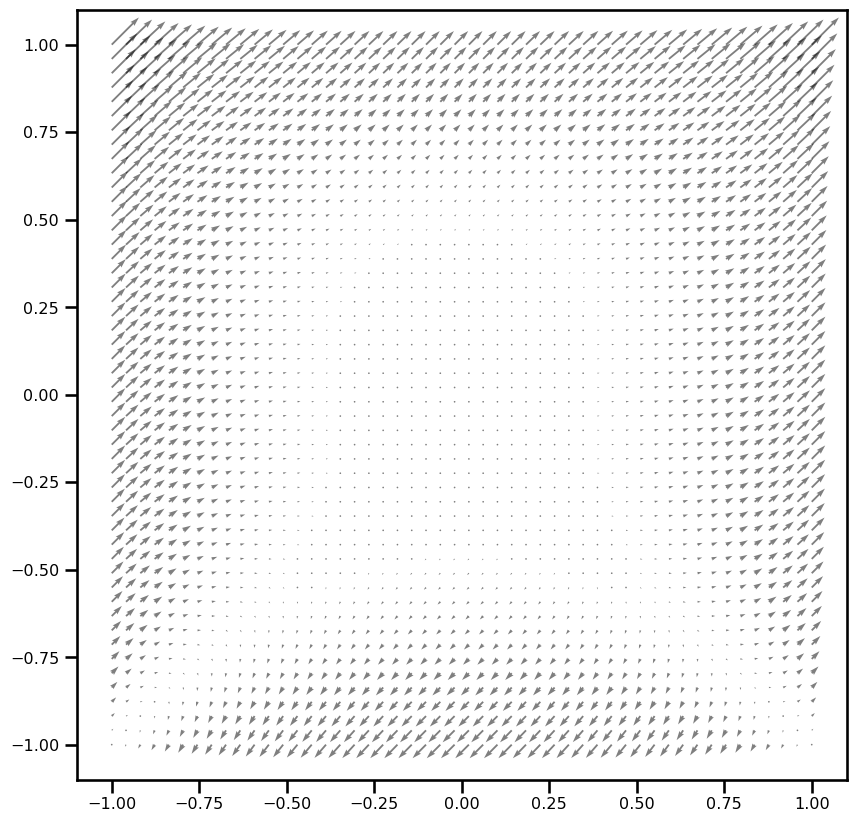

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.quiver(X, Y, F1, F2, color="k", alpha=0.5)

ax.set_aspect("equal", "box")
plt.show()

In [66]:
# x, y, z = [jnp.linspace(0,1,100)] * 3
# dx, dy, dz = x[1]-x[0], y[1]-y[0], z[1]-z[0]
# X, Y, Z = jnp.meshgrid(x,y,z,indexing="ij")
# F1 = X**2 + Y**3
# F2 = X**4

In [67]:
import jax.numpy as jnp

For a 2D function, $\boldsymbol{f}(x,y)$, the partial derivative is:

$$
\partial_x \boldsymbol{f}(\mathbf{x},\mathbf{y}) =
\lim_{\epsilon\rightarrow 0} \frac{\boldsymbol{f}(\mathbf{x}+\epsilon,\mathbf{y})-
\boldsymbol{f}(\mathbf{x},\mathbf{y})}{\epsilon}
$$

For discrete data, we can approximate this using finite differences:

$$
\partial_x f(x,y) \approx \frac{f(x+1,y)-f(x,y)}{1}
$$

## Laplacian

### Finite Difference

In [74]:
import serket as sk


# F1/dx: differentiate F1 wrt x
dF1dx = sk.fd.difference(F1, axis=0, step_size=dx, accuracy=10)
# np.testing.assert_allclose(dF1dx, 2*X.squeeze(), atol=1e-7)


dF2dy = sk.fd.difference(F2, axis=1, step_size=dy, accuracy=6)

dF1dx.shape, dF2dy.shape

((50, 50), (50, 50))

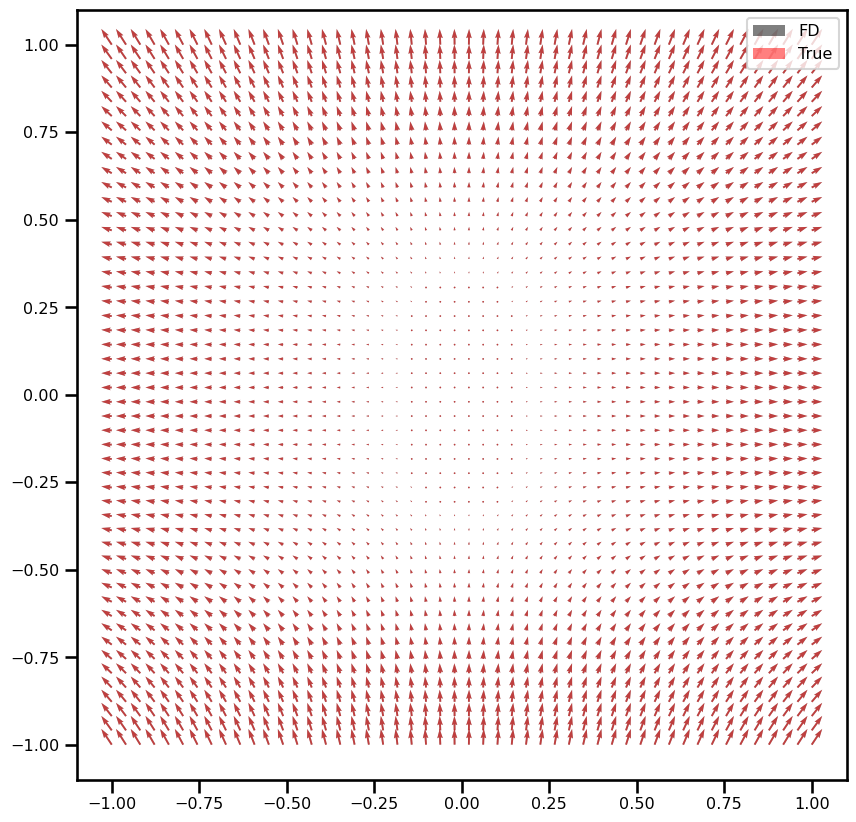

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.quiver(X, Y, dF1dx, dF2dy, color="k", alpha=0.5, label="FD")
ax.quiver(X, Y, 2 * X, 3 * Y**2, color="red", alpha=0.5, label="True")

plt.legend()
ax.set_aspect("equal", "box")
plt.show()

In [70]:
F.shape

(2, 50, 50)

In [89]:
dF = sk.fd.gradient(F1, step_size=(dx, dy), accuracy=6)


d2F = sk.fd.laplacian(F1, step_size=(dx, dy), accuracy=6)
dF.shape, d2F.shape

((2, 50, 50), (50, 50))

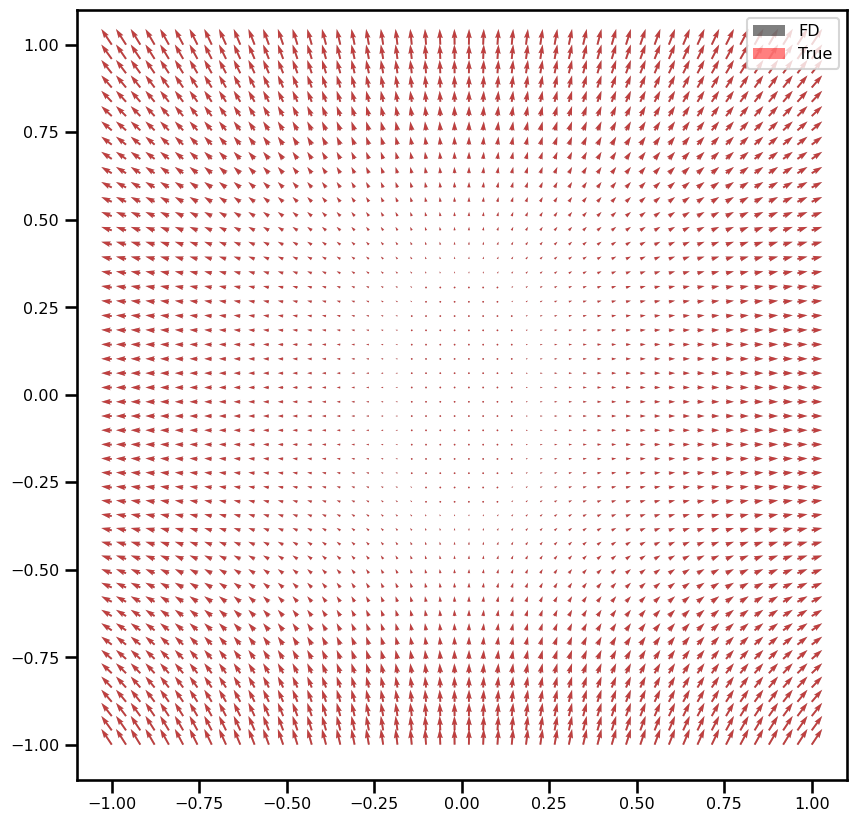

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.quiver(X, Y, dF[0], dF[1], color="k", alpha=0.5, label="FD")
ax.quiver(X, Y, 2 * X, 3 * Y**2, color="red", alpha=0.5, label="True")

plt.legend()
ax.set_aspect("equal", "box")
plt.show()

In [26]:
dF1dx.shape, F1.shape

((50, 50), (50, 50))

### Convolution

In [98]:
import jax


def gradient_1D(array, step=1.0):
    kernel = jnp.array([0.5, 0, 0.5])

    lhs = array[np.newaxis, np.newaxis, Ellipsis]
    rhs = kernel[np.newaxis, np.newaxis, Ellipsis] / step**2

    result = jax.lax.conv(lhs, rhs, window_strides=(1,) * array.ndim, padding="SAME")
    squeezed = np.squeeze(result, axis=(0, 1))

    return squeezed


def gradient_2D(array, step=1.0):
    kernel = jnp.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]])

    lhs = array[np.newaxis, np.newaxis, Ellipsis]
    rhs = kernel[np.newaxis, np.newaxis, Ellipsis] / step**2

    result = jax.lax.conv(lhs, rhs, window_strides=(1,) * array.ndim, padding="SAME")
    squeezed = np.squeeze(result, axis=(0, 1))

    return squeezed


def laplacian_1D(array, step=1.0):
    kernel = jnp.array([1, -2, 1])

    lhs = array[np.newaxis, np.newaxis, Ellipsis]
    rhs = kernel[np.newaxis, np.newaxis, Ellipsis] / step**2

    result = jax.lax.conv(lhs, rhs, window_strides=(1,) * array.ndim, padding="SAME")
    squeezed = np.squeeze(result, axis=(0, 1))

    return squeezed


def laplacian_2D(array, step=1.0):
    kernel = jnp.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    lhs = array[np.newaxis, np.newaxis, Ellipsis]
    rhs = kernel[np.newaxis, np.newaxis, Ellipsis] / step**2

    result = jax.lax.conv(lhs, rhs, window_strides=(1,) * array.ndim, padding="SAME")
    squeezed = np.squeeze(result, axis=(0, 1))

    return squeezed

In [99]:
img.shape

(512, 512, 3)

In [100]:
d2F1dx2 = gradient_2D(F1)
d2F2dy2 = gradient_2D(F2)

d2F1dx2.shape, d2F2dy2.shape

((50, 50), (50, 50))

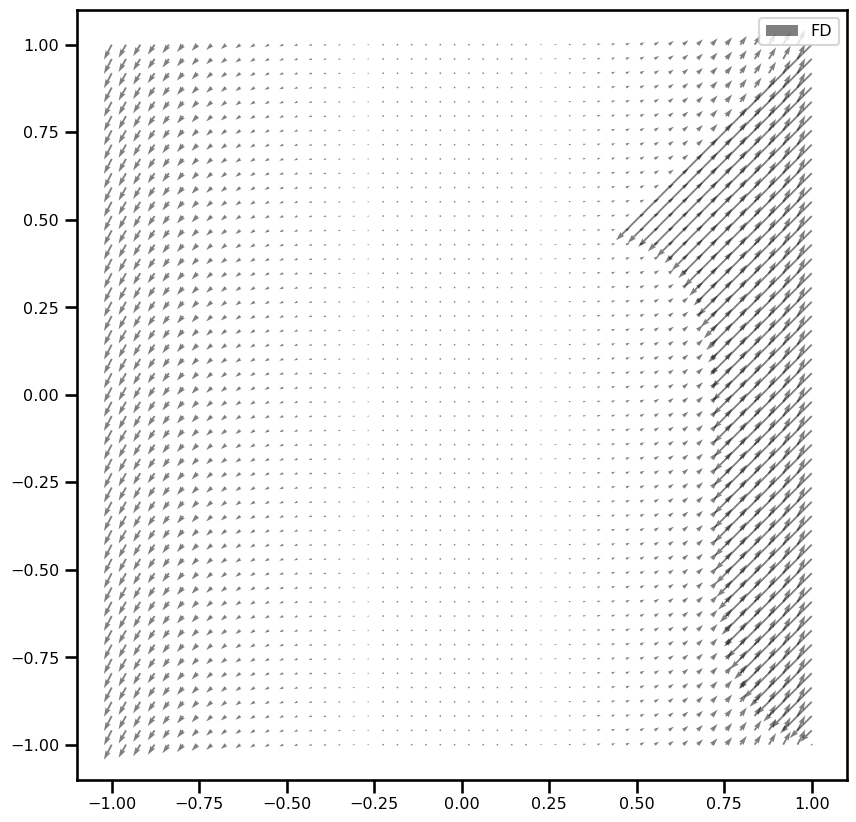

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.quiver(X, Y, d2F1dx2, d2F2dy2, color="k", alpha=0.5, label="FD")
# ax.quiver(X, Y, 2*X, 3*Y**2, color="red", alpha=0.5, label="True")

plt.legend()
ax.set_aspect("equal", "box")
plt.show()

### Kernex

First Order (One-Side, Backwards), 2-Point Stencil:

$$
f'=\frac{f_i-f_{i-1}}{\Delta x}
$$

---

First Order (One-Side, Forward), 2-Point Stencil:

$$
f' = \frac{f_{i+1}-f_i}{\Delta x}
$$

---

Second Order (Two-Sided, Cenetered), 3-Point Stencil:

$$
f' = \frac{f_{i+1}-f_{i-1}}{2\Delta x}
$$

---


Fourth-Order (2-Sided,Centered), 5-Point Stencil:

$$
f' = \frac{-f_{i+2}+8f_{i+1}-8f_{i-1}+f_{i-2}}{12\Delta x}
$$

5-Point Stencil

$$
(x-2h,x-h,x,x+h,x+2h)
$$

In [ ]:
@kex.kmap(kernel_size=(3, 3), padding="valid", relative=True)
def fd_forward(x):
    return x[0, 0] - x[0, 1]


@kex.kmap(kernel_size=(3, 3), padding="valid", relative=True)
def stencil(x):
    return 0.25 * (x[0, 1] + x[1, 0] + x[0, -1] + x[-1, 0])


@kex.kmap(kernel_size=(3, 3), padding="valid", relative=True)
def sobel_x(x):
    return (
        1 * x[1, -1]
        + 0 * x[1, 0]
        + -1 * x[1, 1]
        + 2 * x[0, -1]
        + 0 * x[0, 0]
        + -2 * x[0, 1]
        + 1 * x[-1, 1]
        + 0 * x[-1, 0]
        + -1 * x[-1, 1]
    )


@kex.kmap(kernel_size=(3, 3), padding="valid", relative=True)
def sobel_y(x):
    return (
        1 * x[1, -1]
        + 2 * x[1, 0]
        + 1 * x[1, 1]
        + 0 * x[0, -1]
        + 0 * x[0, 0]
        + 0 * x[0, 1]
        + -1 * x[-1, 1]
        + -2 * x[-1, 0]
        + -1 * x[-1, 1]
    )

5-Point Stencil, laplacian

$$
\frac{f(x-h,y)+f(x+h,y)+f(x,y-h)+f(x,y+h)-4f(x,y)}{h^2}
$$

In [107]:
def laplacian_1d(window_size):
    filter_1d = jnp.ones(window_size)
    filter_1d = filter_1d.at[window_size // 2].set(1 - window_size)
    return filter_1d

In [112]:
lap_filter = laplacian_1d(3)
lap_filter

Array([ 1., -2.,  1.], dtype=float32)

In [7]:
import kernex as kex


@kex.kmap(kernel_size=(3, 3), padding="valid", relative=True)
def laplacian(x):
    return (
        0 * x[1, -1]
        + 1 * x[1, 0]
        + 0 * x[1, 1]
        + 1 * x[0, -1]
        + -4 * x[0, 0]
        + 1 * x[0, 1]
        + 0 * x[-1, 1]
        + 1 * x[-1, 0]
        + 0 * x[-1, 1]
    )


array_ones = jnp.ones([10, 10])

laplacian(array_ones)

Array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)